In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
from utils import *

In [3]:
import glob

In [4]:
d='/glade/derecho/scratch/djk2120/postp/jas/'
dvs=['SOILWATER_10CM','PREC','ET']
ds=xr.Dataset()
for v in dvs:
    files=sorted(glob.glob(d+v+'*.nc'))
    ds[v]=xr.open_mfdataset(files,combine='by_coords')[v]

In [5]:
f='/glade/derecho/scratch/djk2120/postp/jas/cce_era5_i04.nc'
cce=xr.open_dataset(f)

In [19]:
cf=24*60*60*92

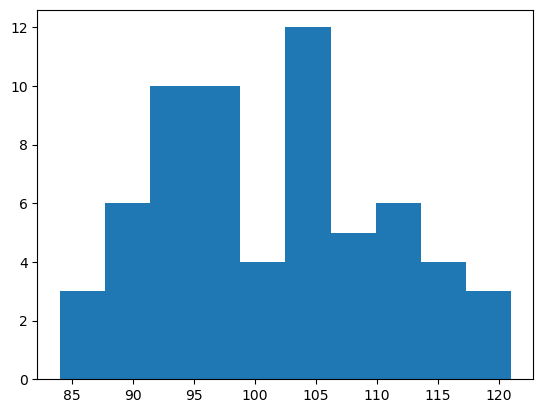

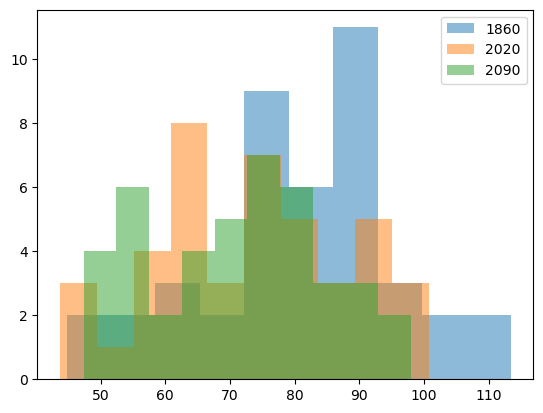

In [32]:
yrs=[1860,2020,2090]
for i,yr in enumerate(yrs):
    ixy=slice(yr-10,yr+10)
    s=ds.SOILWATER_10CM.sel(year=ixy)
    ix=(s<s.quantile(0.02,dim='ens')).compute()
    plt.hist(cf*ds.PREC.sel(year=ixy).where(ix).values.ravel(),color='C{}'.format(i),alpha=0.5,label=yr);
plt.legend();

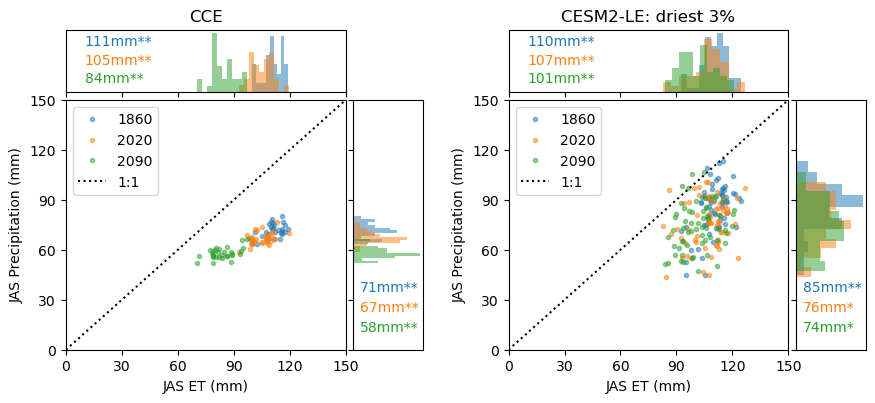

In [121]:
fig = plt.figure(figsize=(10, 4))
gs = fig.add_gridspec(2, 5,  width_ratios=(4,1,1,4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
axx = fig.add_subplot(gs[0, 0])
axy = fig.add_subplot(gs[1, 1])
triplot(cce,1,ax,axx,axy,'CCE')

ax = fig.add_subplot(gs[1, 3])
axx = fig.add_subplot(gs[0, 3])
axy = fig.add_subplot(gs[1, 4])
triplot(ds,0.03,ax,axx,axy,'CESM2-LE')
plt.savefig('../figs/main/scatter_ET_P.png',dpi=300,bbox_inches='tight')

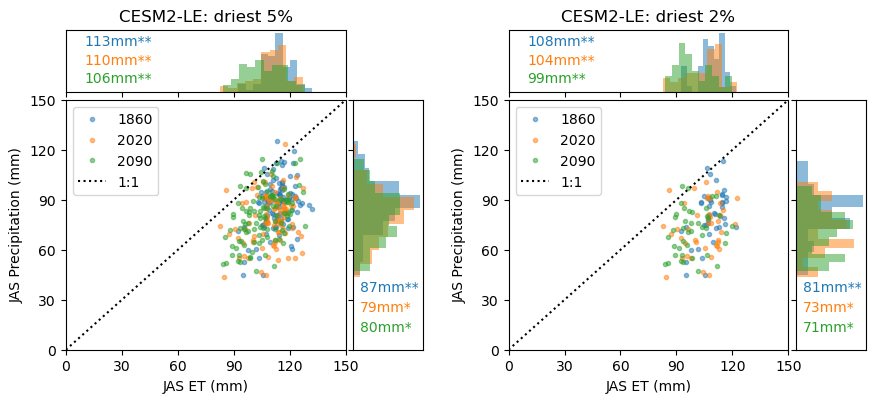

In [120]:
fig = plt.figure(figsize=(10, 4))
gs = fig.add_gridspec(2, 5,  width_ratios=(4,1,1,4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
axx = fig.add_subplot(gs[0, 0])
axy = fig.add_subplot(gs[1, 1])
triplot(ds,0.05,ax,axx,axy,'CESM2-LE')

ax = fig.add_subplot(gs[1, 3])
axx = fig.add_subplot(gs[0, 3])
axy = fig.add_subplot(gs[1, 4])
triplot(ds,0.02,ax,axx,axy,'CESM2-LE')
plt.savefig('../figs/supp/scatter_ET_P_drier.png',dpi=300,bbox_inches='tight')

In [85]:
print(1860,2020)
for q in [1,0.1,0.05,0.03,0.02,0.01]:
    precs=[]
    for yr in [1860,2020]:
        s=ds.SOILWATER_10CM.sel(year=slice(yr-10,yr+10))
        ixdry=s<s.quantile(q,dim='ens')
        p=cf*ds.PREC.sel(year=slice(yr-10,yr+10)).where(ixdry).values
        p=p[(~np.isnan(p))]
        precs.append(p)
    print(str(q).ljust(5),np.round(precs[0].mean(),1),np.round(precs[1].mean(),1),stats.ttest_ind(precs[1],precs[0])[1])
print(2020,2090)
for q in [1,0.1,0.05,0.03,0.02,0.01]:
    precs=[]
    for yr in [2020,2090]:
        s=ds.SOILWATER_10CM.sel(year=slice(yr-10,yr+10))
        ixdry=s<s.quantile(q,dim='ens')
        p=cf*ds.PREC.sel(year=slice(yr-10,yr+10)).where(ixdry).values
        p=p[(~np.isnan(p))]
        precs.append(p)
    print(str(q).ljust(5),np.round(precs[0].mean(),1),np.round(precs[1].mean(),1),stats.ttest_ind(precs[1],precs[0])[1])

print(1860,2090)
for q in [1,0.1,0.05,0.03,0.02,0.01]:
    precs=[]
    for yr in [1860,2090]:
        s=ds.SOILWATER_10CM.sel(year=slice(yr-10,yr+10))
        ixdry=s<s.quantile(q,dim='ens')
        p=cf*ds.PREC.sel(year=slice(yr-10,yr+10)).where(ixdry).values
        p=p[(~np.isnan(p))]
        precs.append(p)
    print(str(q).ljust(5),np.round(precs[0].mean(),1),np.round(precs[1].mean(),1),stats.ttest_ind(precs[1],precs[0])[1])

1860 2020
1     137.0 130.8 5.2522854422714926e-11
0.1   94.2 86.7 4.7435753553861e-06
0.05  86.8 79.4 0.0003252828440333072
0.03  84.7 76.4 0.001783319393068866
0.02  80.6 73.3 0.03181662505051113
0.01  75.8 69.3 0.18269720328621514
2020 2090
1     130.8 134.4 0.00014368566108868307
0.1   86.7 88.3 0.3235255448535188
0.05  79.4 80.2 0.70606685766652
0.03  76.4 74.3 0.4149054214323651
0.02  73.3 71.4 0.5390716475288424
0.01  69.3 65.6 0.3663542086672479
1860 2090
1     137.0 134.4 0.0058171796069866775
0.1   94.2 88.3 0.00045768069317429316
0.05  86.8 80.2 0.0018173430724702142
0.03  84.7 74.3 0.00010189653694992937
0.02  80.6 71.4 0.005057773881789979
0.01  75.8 65.6 0.03522420529044282


In [91]:
print(1850,2020)
for q in [1,0.1,0.05,0.03,0.02,0.01]:
    precs=[]
    for yr in [1850,2020]:
        s=ds.SOILWATER_10CM.sel(year=slice(yr-10,yr+10))
        ixdry=s<s.quantile(q,dim='ens')
        p=cf*ds.ET.sel(year=slice(yr-10,yr+10)).where(ixdry).values
        p=p[(~np.isnan(p))]
        precs.append(p)
    print(str(q).ljust(5),np.round(precs[0].mean(),1),np.round(precs[1].mean(),1),stats.ttest_ind(precs[1],precs[0])[1])
print(2020,2090)
for q in [1,0.1,0.05,0.03,0.02,0.01]:
    precs=[]
    for yr in [1860,2020,2090]:
        s=ds.SOILWATER_10CM.sel(year=slice(yr-10,yr+10))
        ixdry=s<s.quantile(q,dim='ens')
        p=cf*ds.ET.sel(year=slice(yr-10,yr+10)).where(ixdry).values
        p=p[(~np.isnan(p))]
        precs.append(p)
    print(str(q).ljust(5),np.round(precs[0].mean(),1),np.round(precs[1].mean(),1),stats.ttest_ind(precs[1],precs[0])[1])

1850 2020
1     135.4 137.8 1.5313252070036184e-06
0.1   117.4 114.9 0.015976541367238972
0.05  113.9 109.9 0.005055726158120172
0.03  111.5 106.6 0.01158500003260878
0.02  109.8 104.1 0.01615681059347081
0.01  108.1 100.5 0.05000406671720233
2020 2090
1     135.5 137.8 8.914651277649668e-09
0.1   117.2 114.9 0.007342054845184661
0.05  113.3 109.9 0.003737024118587351
0.03  110.4 106.6 0.011997822284454849
0.02  108.4 104.1 0.020016869970741185
0.01  106.0 100.5 0.06274910917110252


In [106]:
xs

[array([103.68061849, 111.3094655 ,  92.53644127, 108.02233855,
        101.83298432, 114.59858582, 104.92816655, 115.27213871,
        113.45593163, 116.19481052, 107.2763769 ,  95.07326753,
        107.12255753, 107.12281671, 112.89827271,  95.35101746,
        104.92117337,  95.38970338, 105.59438703, 105.6871881 ,
        107.61106897]),
 array([100.57951389,  90.52863338,  92.76603143,  95.60528874,
         84.60569182,  94.73271698,  94.16501225,  96.25289565,
        113.61978484, 121.30209917, 105.38015853, 104.45636551,
        108.46386202,  87.30060385, 112.65612667, 111.78596293,
        108.22248255, 112.29458069, 107.81493598,  85.83474649,
         82.66367666]),
 array([ 92.270466  ,  92.47232887,  93.70563712,  96.43385818,
         97.80344605, 101.68769931,  87.93783507,  93.32228318,
         92.87871657,  88.93404358,  98.60465168,  96.39939613,
         89.36610909, 106.84780863, 111.65157959,  91.31421298,
         85.42319709,  84.00177575,  89.21324076,  95.54

In [103]:
def sigstrs(xs):
    strs=[]
    for i in range(3):
        s=''
        for j in range(3):
            f,p=stats.ttest_ind(xs[i],xs[j])
            if p<0.05:
                s=s+'*'
        strs.append(s)
    return strs
        
        

In [99]:
f

0.0

In [64]:
from scipy import stats

In [91]:
int(100*0.05)

5

In [118]:
def triplot(ds,q,ax,axx,axy,title):
    if q<1:
        title=title+': driest '+str(int(100*q))+'%'
    cf=24*60*60*92
    xs=[]
    ys=[]
    for i,yr in enumerate([1860,2020,2090]):
        ixt=slice(yr-10,yr+10)
        s=ds.SOILWATER_10CM.sel(year=ixt)
        ixdry=(s<=s.quantile(q,dim='ens')).compute()
        x=cf*ds.ET.sel(year=ixt).where(ixdry).values.ravel()
        y=cf*ds.PREC.sel(year=ixt).where(ixdry).values.ravel()
        
        ax.plot(x,y,'.',alpha=0.5,label=yr)
        axx.hist(x,density=True,alpha=0.5)
        axy.hist(y,density=True,alpha=0.5,orientation='horizontal')
        xs.append(x[~np.isnan(x)])
        ys.append(y[~np.isnan(y)])
    
    xstrs=sigstrs(xs)
    ystrs=sigstrs(ys)
    for i,yr in enumerate([1860,2020,2090]):
        a,b=axx.get_ylim()
        axx.text(10,(0.75-0.3*i)*b,
                 str(int(np.round(np.nanmean(xs[i]))))+'mm'+xstrs[i],
                 color='C'+str(i))
        a,b=axy.get_xlim()
        axy.text(0.1*b,35-12*i,
                 str(int(np.round(np.nanmean(ys[i]))))+'mm'+ystrs[i],
                 color='C'+str(i))
                 
    ax.plot([0,150],[0,150],'k:',label='1:1')
    ax.set_xlim([0,150])
    ax.set_ylim([0,150])
    ax.set_xlabel('JAS ET (mm)')
    ax.set_ylabel('JAS Precipitation (mm)')
    ax.set_xticks(range(0,180,30))
    ax.set_yticks(range(0,180,30))
    ax.legend(loc=2)
    axx.set_xticks(range(0,180,30))
    axx.set_xticklabels([])
    axx.set_yticks([])
    axx.set_title(title)
    axy.set_xticks([])
    axy.set_yticks(range(0,180,30))
    axy.set_yticklabels([]);

(0.0, 0.07019066620515152)

104.9